In [51]:
import numpy as np

from classes.projectile import Projectile
from classes.constant import * 
from classes import trajectories as Trajectory

projectile = Projectile("S&B FMJ 147grs", cal_inch=0.308, m_grs=147, G1=0.25, SD_inch=0.221) #G1=0.489

Tabulka naměřených hodnot

$\begin{bmatrix}
    v & s \\
    850 & 0 \\
    775 & 100 \\
    704 & 200 \\
    636 & 300 \\
    573 & 400 \\
\end{bmatrix}$

In [52]:
v_s = Trajectory.create_vs((850,775,704,636,573,512),(0,100,200,300,400,500))

Trajectory.printTable(v_s,{'v':"m/s",'s':"m"},precision=0)

v: 850m/s, s: 0m
v: 775m/s, s: 100m
v: 704m/s, s: 200m
v: 636m/s, s: 300m
v: 573m/s, s: 400m
v: 512m/s, s: 500m


Vytvoření tabulky $vt$ z $vs$ 

In [53]:
v_t = Trajectory.create_vt_from_vs(v_s)

Trajectory.printTable(v_t,{'v':"m/s",'t':"m"},precision=2)

v: 850.0m/s, t: 0.0m
v: 775.0m/s, t: 0.13m
v: 704.0m/s, t: 0.28m
v: 636.0m/s, t: 0.47m
v: 573.0m/s, t: 0.7m
v: 512.0m/s, t: 0.98m


Výpočet odporové funkce

In [54]:
dragFunction = Trajectory.createDragFunction(v_t, projectile=projectile,deg=4)

Výpočet trajektorie z odporové funkce pro počáteční rychlost $850m/s$ a nástřelnou vzdálenost $100m$

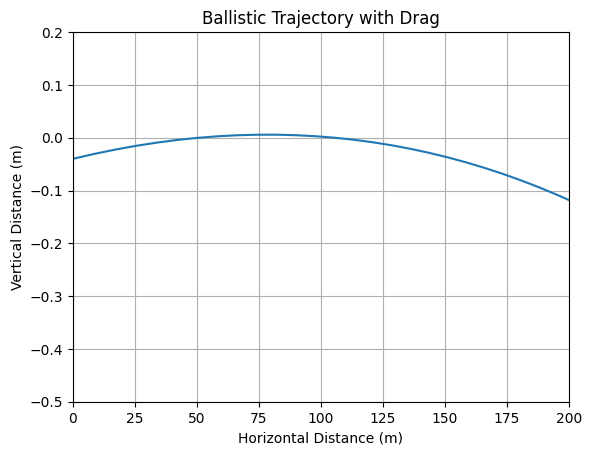

Measured drop at distance of 100 is 0.00mm


In [55]:
angle = 0.00114235
h = -0.04 #scope height

app850poly = Trajectory.trajectory(projectile, alpha0=angle, y0=h, dragSource=dragFunction, v=850) 

Trajectory.plot(table_x0_y1=app850poly,x_limit=(0,200),y_limit=(0.2,-0.5),name="Approximated with polynomial 850m/s")
print(f"Measured drop at distance of {100} is {Trajectory.getValues(app850poly,100)[0]*1000:.2f}mm")

In [56]:
Trajectory.printTable(Trajectory.normTwoCols(Trajectory.compact(app850poly),(2,3)), {"x":"m","y":"m","v":"m/s"}, precision=3)

x: 100.0m, y: 0.0m, v: 774.601m/s
x: 200.0m, y: -0.123m, v: 713.594m/s
x: 300.0m, y: -0.451m, v: 656.468m/s
x: 400.0m, y: -1.009m, v: 606.623m/s
x: 500.0m, y: -1.823m, v: 562.524m/s


In [57]:
trajectory850 = Trajectory.trajectory(projectile,850,angle,h)

dist = 500
poly = Trajectory.getValues(app850poly,dist)[0]*100
calc = Trajectory.getValues(trajectory850,dist)[0]*100
print(f"Measured drop at distance of {dist} is {poly:.2f}cm")
print(f"Calculated drop at distance of {dist} using ballictic coefficient {projectile.G1} is {calc:.2f}cm")

print(f"\nDifference is {poly-calc:.2f}cm")

Measured drop at distance of 500 is -182.30cm
Calculated drop at distance of 500 using ballictic coefficient 0.25 is -171.67cm

Difference is -10.63cm
